# PYTHON 3

## Lecture 09
### NumPy

<img src="https://avatars.mds.yandex.net/get-entity_search/58808/261054429/S122x122Fit_2x" align="right" style="height: 200px;"/>

### Chupov Dmitrii


MIPT 2024

## Что такое NumPy?

Это библиотека с открытым исходным кодом, некогда отделившаяся от проекта SciPy. NumPy является наследником Numeric и NumArray. Основан NumPy на библиотеке LAPAC, которая написана на Fortran. Не-python альтернативой для NumPy является Matlab.

В силу того, что NumPy базируется на Fortran это быстрая библиотека. А в силу того, что поддерживает векторные операции с многомерными массивами — крайне удобная.

## Примеры

In [6]:
import numpy as np

- __numpy.linalg__ — реализует операции линейной алгебры (простое умножение векторов и матриц есть в базовом варианте);
- __numpy.random__ — реализует функции для работы со случайными величинами;
- __numpy.fft__ — реализует прямое и обратное преобразование Фурье.

## Массивы

In [8]:
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

#### У массивов в numpy есть измерения:

In [9]:
# 0-D arrays
arr = np.array(42)
arr

array(42)

In [10]:
# 1-D arrays
arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

In [12]:
# 2-D arrays
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
# 3-D arrays
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
arr

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

#### Shape

In [14]:
# dimensions
arr.ndim

3

In [15]:
# shape
arr.shape

(2, 2, 3)

In [16]:
arr = np.array([1, 2, 3, 4], ndmin=5)
arr

array([[[[[1, 2, 3, 4]]]]])

In [17]:
arr.ndim

5

In [18]:
arr.shape

(1, 1, 1, 1, 4)

#### Reshape

In [37]:
arr.reshape(4, )

array([1, 2, 3, 4])

In [38]:
arr.reshape(4, 1)

array([[1],
       [2],
       [3],
       [4]])

In [73]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr.reshape(-1)

array([1, 2, 3, 4, 5, 6])

#### Индесация

In [34]:
arr = np.array([1, 2, 3, 4])
arr

array([1, 2, 3, 4])

In [35]:
arr[0]

1

In [41]:
arr.reshape(4, 1)[3][0]

4

In [42]:
arr.reshape(4, 1)[3, 0]

4

In [44]:
# negative index
arr.reshape(4, 1)[-1, 0]

4

#### Slices

In [45]:
# slices
arr[1:3]

array([2, 3])

In [48]:
# slices with step
arr[0:3:2]

array([1, 3])

In [50]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
arr[1, 1:4]

array([7, 8, 9])

In [52]:
arr[0:2, 1:4]

array([[2, 3, 4],
       [7, 8, 9]])

#### Types

In [53]:
arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int64')

In [54]:
arr = np.array(['apple', 'banana', 'cherry'])
arr.dtype

dtype('<U6')

In [64]:
arr = np.array([1, 2, 3, 4], dtype='S')
print(arr)
arr.dtype

[b'1' b'2' b'3' b'4']


dtype('S1')

In [62]:
arr = np.array([1, 2, 3, 4], dtype='i1')
print(arr)
arr.dtype

[1 2 3 4]


dtype('int8')

In [59]:
arr = np.array(['a', '2', '3'], dtype='i')

ValueError: invalid literal for int() with base 10: 'a'

In [60]:
arr = np.array([1.1, 2.1, 3.1])
newarr = arr.astype('i')

print(arr, newarr)
print(arr.dtype, newarr.dtype)

[1.1 2.1 3.1] [1 2 3]
float64 int32


#### Copy vs View

In [66]:
arr = np.array([1, 2, 3, 4, 5])
x = arr.copy()
arr[0] = 42

print(arr)
print(x)

[42  2  3  4  5]
[1 2 3 4 5]


In [69]:
arr = np.array([1, 2, 3, 4, 5])
x = arr.view()
arr[0] = 42
x[3] = 31

print(arr)
print(x)

[42  2  3 31  5]
[42  2  3 31  5]


In [70]:
arr = np.array([1, 2, 3, 4, 5])

x = arr.copy()
y = arr.view()

print(x.base)
print(y.base)

None
[1 2 3 4 5]


In [72]:
# reshape return a view!

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

print(arr.reshape(2, 4).base)

[1 2 3 4 5 6 7 8]


#### Iterating

In [74]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

for x in arr:
  print(x)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]


In [75]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

for x in arr:
  for y in x:
    for z in y:
      print(z)

1
2
3
4
5
6
7
8
9
10
11
12


In [77]:
# nditer
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
for x in np.nditer(arr):
  print(x)

1
2
3
4
5
6
7
8


In [78]:
# skipping 1 element

arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

for x in np.nditer(arr[:, ::2]):
  print(x)

1
3
5
7


In [79]:
# ndenumerate

arr = np.array([1, 2, 3])

for idx, x in np.ndenumerate(arr):
  print(idx, x)

(0,) 1
(1,) 2
(2,) 3


In [80]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

for idx, x in np.ndenumerate(arr):
  print(idx, x)

(0, 0) 1
(0, 1) 2
(0, 2) 3
(0, 3) 4
(1, 0) 5
(1, 1) 6
(1, 2) 7
(1, 3) 8


#### Concatenate

In [81]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
np.concatenate((arr1, arr2))

array([1, 2, 3, 4, 5, 6])

In [85]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
np.concatenate((arr1, arr2), axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [86]:
np.concatenate((arr1, arr2), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

#### Stack

In [99]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

In [100]:
np.stack((arr1, arr2))

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
np.stack((arr1, arr2), axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

#### VStack vs HStack

In [95]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

In [97]:
np.hstack((arr1, arr2))

array([1, 2, 3, 4, 5, 6])

In [98]:
np.vstack((arr1, arr2))

array([[1, 2, 3],
       [4, 5, 6]])

#### array_split

In [104]:
arr = np.array([1, 2, 3, 4, 5, 6])

In [105]:
np.array_split(arr, 2)

[array([1, 2, 3]), array([4, 5, 6])]

In [106]:
np.array_split(arr, 4)

[array([1, 2]), array([3, 4]), array([5]), array([6])]

In [107]:
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])

np.array_split(arr, 3)


[array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]),
 array([[ 9, 10],
        [11, 12]])]

In [109]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

np.array_split(arr, 3, axis=1)

[array([[ 1],
        [ 4],
        [ 7],
        [10],
        [13],
        [16]]),
 array([[ 2],
        [ 5],
        [ 8],
        [11],
        [14],
        [17]]),
 array([[ 3],
        [ 6],
        [ 9],
        [12],
        [15],
        [18]])]

#### Where

In [112]:
arr = np.array([1, 2, 3, 4, 5, 4, 4])

In [113]:
np.where(arr == 4)

(array([3, 5, 6]),)

In [116]:
np.where(arr % 2 == 0)

(array([1, 3, 5, 6]),)

#### Search Sorted

In [123]:
arr = np.array([6, 7, 8, 9])

In [124]:
np.searchsorted(arr, 7)

1

In [125]:
np.searchsorted(arr, 7, side='right')

2

In [128]:
np.searchsorted(arr, [7.5, 10, 6])

array([2, 4, 0])

#### Sort

In [136]:
arr = np.array([3, 2, 0, 1])
np.sort(arr)

array([0, 1, 2, 3])

In [135]:
arr = np.array(['banana', 'cherry', 'apple'])
np.sort(arr)

array(['apple', 'banana', 'cherry'], dtype='<U6')

In [137]:
arr = np.array([[3, 2, 4], [5, 0, 1]])

array([[2, 3, 4],
       [0, 1, 5]])

In [138]:
np.sort(arr)

array([[2, 3, 4],
       [0, 1, 5]])

In [140]:
np.sort(arr, axis=0)

array([[3, 0, 1],
       [5, 2, 4]])

#### Filter

In [143]:
arr = np.array([41, 42, 43, 44])

x = [True, False, True, False]

arr[x]

array([41, 43])

In [145]:
arr = np.array([1, 2, 3, 4, 5, 6, 7])

filter_arr = arr % 2 == 0

arr[filter_arr]

array([2, 4, 6])

In [146]:
filter_arr

array([False,  True, False,  True, False,  True, False])

#### Arithmetic

##### 0-D

In [147]:
arr1 = np.array([41, 42, 43, 44])
arr2 = np.array([45, 46, 47, 48])

In [148]:
arr1 + arr2

array([86, 88, 90, 92])

In [149]:
arr1 - arr2

array([-4, -4, -4, -4])

In [150]:
arr1 * arr2

array([1845, 1932, 2021, 2112])

In [151]:
arr1 @ arr2

7910

##### 2-D 

In [161]:
arr2 = np.array([45, 46, 47, 48]).reshape(4,1)

In [165]:
arr2

array([[45],
       [46],
       [47],
       [48]])

In [163]:
arr1 + arr2

array([[86, 87, 88, 89],
       [87, 88, 89, 90],
       [88, 89, 90, 91],
       [89, 90, 91, 92]])

In [166]:
arr1 * arr2

array([[1845, 1890, 1935, 1980],
       [1886, 1932, 1978, 2024],
       [1927, 1974, 2021, 2068],
       [1968, 2016, 2064, 2112]])

In [167]:
arr1 @ arr2

array([7910])

In [230]:
arr1 * 17

array([697, 714, 731, 748])

## Random

#### Randint and Randfloat

In [172]:
from numpy import random

In [177]:
# random int from 0 upto 100
random.randint(100)

24

In [178]:
# random float from 0 upto 1
random.rand()

0.6471315876652617

In [179]:
# random int array
random.randint(100, size=(5))

array([89, 35,  7, 77, 63])

In [180]:
# random flaot array
random.rand(5)

array([0.83841852, 0.63596294, 0.23133785, 0.02931673, 0.70575016])

In [181]:
random.rand(3, 5)

array([[0.41369448, 0.97755274, 0.77908673, 0.89370646, 0.34641368],
       [0.7108151 , 0.34585453, 0.13828589, 0.10307103, 0.1386589 ],
       [0.76176429, 0.0519087 , 0.24492795, 0.3067174 , 0.9830024 ]])

#### Choice

In [182]:
random.choice([3, 5, 7, 9])

3

In [184]:
random.choice([3, 5, 7, 9], size=(3, 5))

array([[5, 3, 7, 3, 9],
       [7, 9, 5, 5, 9],
       [3, 7, 7, 3, 7]])

In [189]:
# choice with distribution
random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(100))

array([7, 5, 5, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 5, 7, 7, 5, 7, 7, 7,
       3, 5, 5, 7, 7, 5, 7, 7, 7, 7, 7, 5, 7, 5, 5, 7, 3, 5, 7, 7, 7, 7,
       7, 7, 5, 7, 5, 7, 7, 5, 5, 7, 7, 7, 3, 7, 7, 7, 7, 5, 7, 5, 7, 7,
       7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5, 7, 5, 7, 7, 5, 7, 7, 5, 5, 5, 7,
       7, 7, 7, 5, 5, 7, 3, 7, 7, 5, 7, 7])

In [190]:

random.choice([3, 5, 7, 9], p=[0.15, 0.3, 0.6, 0.0], size=(100))

ValueError: probabilities do not sum to 1

#### Shuffle

In [192]:
arr = np.array([1, 2, 3, 4, 5])
random.shuffle(arr)
arr

array([4, 2, 5, 3, 1])

In [193]:
random.permutation(arr)

array([3, 4, 2, 5, 1])

In [194]:
arr

array([4, 2, 5, 3, 1])

#### Normal

In [196]:
random.normal(size=(2, 3))

array([[ 1.69970231,  0.13655193, -0.03169278],
       [ 0.03538969, -0.51604891,  0.48375696]])

In [195]:
random.normal(loc=1, scale=2, size=(2, 3))

array([[ 1.41056107,  4.60961049,  3.69947655],
       [-1.46915394,  1.35979794, -0.12331248]])

/var/tmp/ipykernel_581516/531753702.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(size=1000), hist=False)


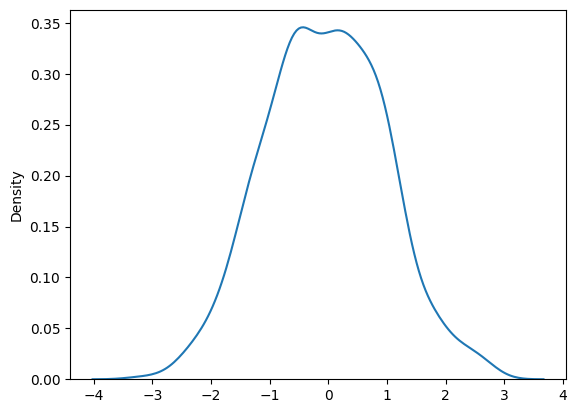

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(size=1000), hist=False)

plt.show()

In [202]:
random.binomial(n=10, p=0.5, size=10)

array([3, 5, 5, 4, 7, 6, 6, 5, 6, 7])

/var/tmp/ipykernel_581516/862251856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=True)


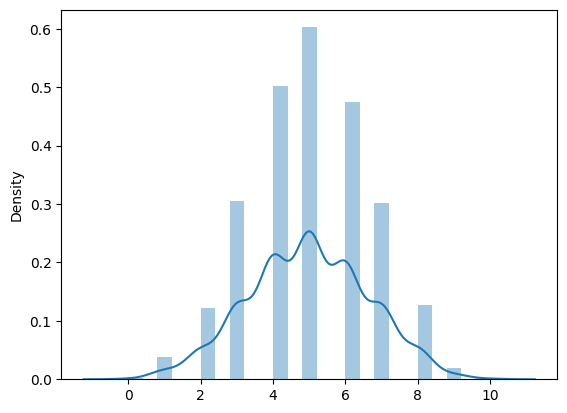

In [229]:
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=True)

plt.show()

/var/tmp/ipykernel_581516/2394222087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=True, label='normal')
/var/tmp/ipykernel_581516/2394222087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=T

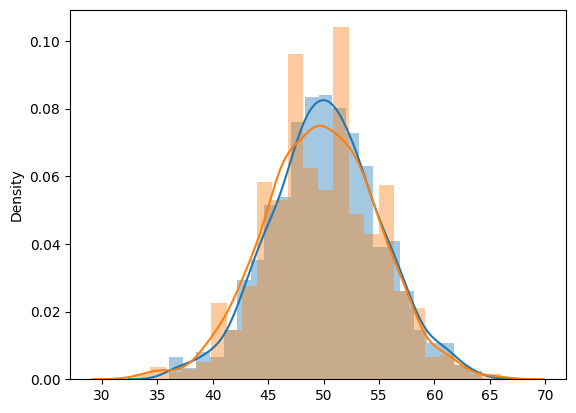

In [228]:
sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=True, label='normal')
sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=True, label='binomial')

plt.show()

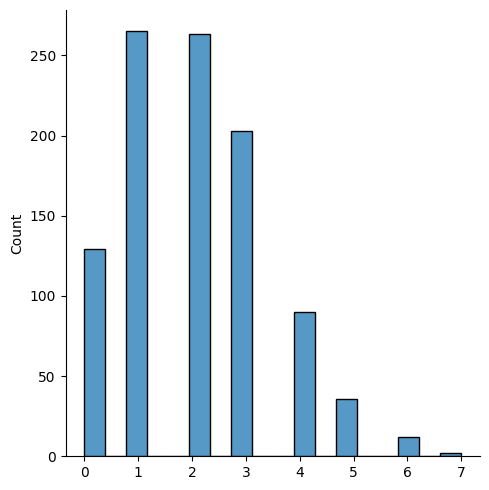

In [208]:
sns.displot(random.poisson(lam=2, size=1000), kde=False)

plt.show()

/var/tmp/ipykernel_581516/4134266985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=True, label='normal')
/var/tmp/ipykernel_581516/4134266985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=50, size=1000), hist=True, la

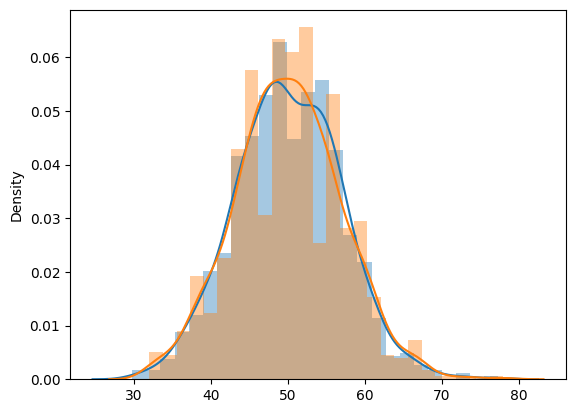

In [227]:
sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=True, label='normal')
sns.distplot(random.poisson(lam=50, size=1000), hist=True, label='poisson')

plt.show()

In [217]:
# default from (0, 1)
random.uniform(size=(2, 3))

array([[0.63906084, 0.93119801, 0.50900046],
       [0.62153577, 0.12300187, 0.8254125 ]])

/var/tmp/ipykernel_581516/1240574470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.uniform(size=1000), hist=True)


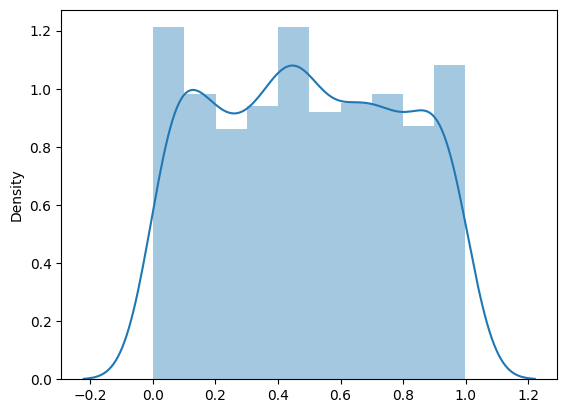

In [226]:
sns.distplot(random.uniform(size=1000), hist=True)

plt.show()

## Universal functions

In [235]:
x = [1, 2, 3, 4]
y = [4, 5, 6, 7]
np.add(x, y)

array([ 5,  7,  9, 11])

#### Types

In [239]:
print(type(np.add))

<class 'numpy.ufunc'>


In [238]:
print(type(np.concatenate))

<class 'function'>


#### Sets

In [337]:
arr = np.array([1, 1, 1, 2, 3, 4, 5, 5, 6, 7])

In [338]:
np.unique(arr)

array([1, 2, 3, 4, 5, 6, 7])

In [342]:
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([3, 4, 5, 6])

In [343]:
np.union1d(arr1, arr2)

array([1, 2, 3, 4, 5, 6])

In [347]:
np.intersect1d(arr1, arr2)

array([3, 4])

In [349]:
np.setdiff1d(arr1, arr2)

array([1, 2])

In [350]:
np.setxor1d(arr1, arr2)

array([1, 2, 5, 6])

## Arithmetic 2

In [247]:
arr1 = np.array([10, 11, 12, 13, 14, 15])
arr2 = np.array([20, 21, 22, 23, 24, 25])

In [249]:
np.add(arr1, arr2)

array([30, 32, 34, 36, 38, 40])

In [251]:
arr1 + arr2

array([30, 32, 34, 36, 38, 40])

In [250]:
np.subtract(arr1, arr2)

array([-10, -10, -10, -10, -10, -10])

In [253]:
arr1 - arr2

array([-10, -10, -10, -10, -10, -10])

In [248]:
np.multiply(arr1, arr2)

array([200, 231, 264, 299, 336, 375])

In [254]:
arr1 * arr2

array([200, 231, 264, 299, 336, 375])

In [255]:
np.divide(arr1, arr2)

array([0.5       , 0.52380952, 0.54545455, 0.56521739, 0.58333333,
       0.6       ])

In [258]:
arr1 / arr2

array([0.5       , 0.52380952, 0.54545455, 0.56521739, 0.58333333,
       0.6       ])

In [259]:
arr1 // arr2

array([0, 0, 0, 0, 0, 0])

In [260]:
np.power(arr1, arr2)

array([ 7766279631452241920,  3105570700629903195,  5729018530666381312,
       -4649523274362944347, -1849127232522420224,  1824414961309619599])

In [261]:
arr1 ** arr2

array([ 7766279631452241920,  3105570700629903195,  5729018530666381312,
       -4649523274362944347, -1849127232522420224,  1824414961309619599])

In [262]:
np.mod(arr1, arr2)

array([10, 11, 12, 13, 14, 15])

In [263]:
arr1 % arr2

array([10, 11, 12, 13, 14, 15])

In [264]:
np.divmod(arr1, arr2)

(array([0, 0, 0, 0, 0, 0]), array([10, 11, 12, 13, 14, 15]))

In [265]:
np.absolute(arr)

array([4, 2, 5, 3, 1])

In [266]:
abs(arr)

array([4, 2, 5, 3, 1])

#### Truncation

In [273]:
arr = np.array([-3.1666, 3.6667])

In [274]:
np.trunc(arr)

array([-3.,  3.])

In [275]:
np.fix(arr)

array([-3.,  3.])

In [276]:
np.around(3.1666, 2)

3.17

In [277]:
np.around(arr, 2)

array([-3.17,  3.67])

In [278]:
np.floor(arr)

array([-4.,  3.])

In [288]:
np.ceil(arr)

array([-3.,  4.])

In [294]:
np.log2(arr)

/var/tmp/ipykernel_581516/1405652587.py:1: RuntimeWarning: invalid value encountered in log2
  np.log2(arr)


array([       nan, 1.87448223])

In [295]:
np.log2(abs(arr))

array([1.66293464, 1.87448223])

In [296]:
np.log10(abs(arr))

array([0.50059321, 0.56427538])

In [297]:
np.log(abs(arr))

array([1.15265846, 1.29929207])

#### frompyfunc

In [289]:
def myadd(x, y):
  return x+y

myadd = np.frompyfunc(myadd, 2, 1)

print(myadd([1, 2, 3, 4], [5, 6, 7, 8]))

[6 8 10 12]


#### arange

In [290]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [291]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [293]:
np.arange(1, 10).reshape(3, 3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### zeros/ones

In [352]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [354]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [355]:
np.ones((10, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

#### sum

In [373]:
arr = np.array([1, 2, 3, 5, 6, 7])

In [374]:
np.sum(arr)

24

In [375]:
arr_reshaped = arr.reshape(2, 3)
arr_reshaped

array([[1, 2, 3],
       [5, 6, 7]])

In [376]:
np.sum(arr_reshaped)

24

In [377]:
np.sum(arr_reshaped, axis=0)

array([ 6,  8, 10])

In [378]:
np.sum(arr_reshaped, axis=1)

array([ 6, 18])

#### mean

In [379]:
np.mean(arr)

4.0

In [380]:
np.mean(arr_reshaped)

4.0

In [381]:
np.mean(arr_reshaped, axis=1)

array([2., 6.])

#### var

In [385]:
np.var(arr)

4.666666666666667

In [386]:
np.var(arr_reshaped)

4.666666666666667

In [387]:
np.var(arr_reshaped, axis=1)

array([0.66666667, 0.66666667])

#### cumsum

In [382]:
np.cumsum(arr)

array([ 1,  3,  6, 11, 17, 24])

In [383]:
np.cumsum(arr_reshaped)

array([ 1,  3,  6, 11, 17, 24])

In [314]:
np.cumsum(arr_reshaped, axis=1)

array([[ 1,  3,  6],
       [ 5, 11, 18]])

#### prod

In [315]:
np.prod(arr)

1260

In [316]:
np.prod(arr_reshaped)

1260

In [317]:
np.prod(arr_reshaped, axis=0)

array([ 5, 12, 21])

#### cumprod

In [318]:
np.cumprod(arr)

array([   1,    2,    6,   30,  180, 1260])

In [319]:
np.cumprod(arr_reshaped)

array([   1,    2,    6,   30,  180, 1260])

In [320]:
np.cumprod(arr_reshaped, axis=1)

array([[  1,   2,   6],
       [  5,  30, 210]])

#### diff

In [322]:
np.diff(arr)

array([1, 1, 2, 1, 1])

In [326]:
np.diff(arr, n=2)

array([ 0,  1, -1,  0])

In [323]:
np.diff(arr_reshaped)

array([[1, 1],
       [1, 1]])

In [324]:
np.diff(arr_reshaped, axis=0)

array([[4, 4, 4]])

#### cos/sin...

In [328]:
np.sin(arr)

array([ 0.84147098,  0.90929743,  0.14112001, -0.95892427, -0.2794155 ,
        0.6569866 ])

In [329]:
np.cos(arr)

array([ 0.54030231, -0.41614684, -0.9899925 ,  0.28366219,  0.96017029,
        0.75390225])

In [330]:
np.rad2deg(arr)

array([ 57.29577951, 114.59155903, 171.88733854, 286.47889757,
       343.77467708, 401.07045659])

In [331]:
np.arcsin(arr)

/var/tmp/ipykernel_581516/1580827672.py:1: RuntimeWarning: invalid value encountered in arcsin
  np.arcsin(arr)


array([1.57079633,        nan,        nan,        nan,        nan,
              nan])

In [334]:
np.arctan(arr)

array([0.78539816, 1.10714872, 1.24904577, 1.37340077, 1.40564765,
       1.42889927])

In [332]:
np.sinh(arr)

array([  1.17520119,   3.62686041,  10.01787493,  74.20321058,
       201.71315737, 548.31612327])

In [335]:
np.arcsinh(arr)

array([0.88137359, 1.44363548, 1.81844646, 2.31243834, 2.49177985,
       2.64412076])

## Зачем вообще?

Самый банальный пример:

$$x_1 + x_2 = 2200$$
$$1,5x_1 + 4x_2 = 5050$$


In [390]:
A = np.array([[1,1], [1.5,4]])
b = np.array([2200, 5050])

np.linalg.solve(A, b)

array([1500.,  700.])